In [1]:
# set random seed
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [9]:
# load data
from tensorflow.keras import datasets
from tensorflow.keras.datasets import imdb
(X_train0, y_train0), (X_test0, y_test) = imdb.load_data(num_words=2000)
X_train0.shape, X_test0.shape, y_train0.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [12]:
# split trainining/validation data
X_train = X_train0[0:20000]
print(X_train.shape)

y_train = y_train0[0:20000]
print(y_train.shape)

X_valid = X_train0[20000:25000]
print(X_valid.shape)

y_valid = y_train0[20000:25000]
print(y_valid.shape)

(20000,)
(20000,)
(5000,)
(5000,)


In [17]:
print(X_train[0])
print(set(y_test))
print(len(set(y_test)))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
{0, 1}
2


In [18]:
# modify feature data
from tensorflow.keras.preprocessing import sequence
X_train = sequence.pad_sequences(X_train, maxlen=100)
print(X_train.shape)

X_valid = sequence.pad_sequences(X_valid, maxlen=100)
print(X_valid.shape)

X_test = sequence.pad_sequences(X_test0, maxlen=100)
print(X_test.shape)

(20000, 100)
(5000, 100)
(25000, 100)


In [20]:
X_train0

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 2, 2, 134, 26, 4, 715, 8, 118, 1634

In [26]:
# LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

model = Sequential()
model.add(Embedding(input_dim = 2000, output_dim = 100))
model.add(Conv1D(50, kernel_size=3,
                 padding='valid',
                 activation='relu'))
model.add(LSTM(100, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         200000    
                                                                 
 conv1d_1 (Conv1D)           (None, None, 50)          15050     
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 275,551
Trainable params: 275,551
Non-trainable params: 0
_________________________________________________________________


In [27]:
# model compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
# training
hist = model.fit(X_train, y_train,
                 batch_size = 100,
                 epochs=10,
                 validation_data = (X_valid, y_valid))

Epoch 1/10
200/200 [==============================] - 57s 261ms/step - loss: 0.5088 - accuracy: 0.7382 - val_loss: 0.3831 - val_accuracy: 0.8322
Epoch 2/10
200/200 [==============================] - 54s 267ms/step - loss: 0.3400 - accuracy: 0.8568 - val_loss: 0.3555 - val_accuracy: 0.8428
Epoch 3/10
200/200 [==============================] - 107s 538ms/step - loss: 0.3001 - accuracy: 0.8777 - val_loss: 0.3483 - val_accuracy: 0.8422
Epoch 4/10
200/200 [==============================] - 114s 568ms/step - loss: 0.2721 - accuracy: 0.8894 - val_loss: 0.3638 - val_accuracy: 0.8376
Epoch 5/10
200/200 [==============================] - 75s 376ms/step - loss: 0.2447 - accuracy: 0.9033 - val_loss: 0.3839 - val_accuracy: 0.8458
Epoch 6/10
200/200 [==============================] - 51s 252ms/step - loss: 0.2108 - accuracy: 0.9201 - val_loss: 0.3655 - val_accuracy: 0.8340
Epoch 7/10
200/200 [==============================] - 52s 259ms/step - loss: 0.1860 - accuracy: 0.9308 - val_loss: 0.3931 - val_

In [29]:
# evaluate model
print(model.evaluate(X_train, y_train)[1])
print(model.evaluate(X_valid, y_valid)[1])
print(model.evaluate(X_test, y_test)[1])

625/625 [==============================] - 47s 73ms/step - loss: 0.1006 - accuracy: 0.9640
0.9639999866485596
157/157 [==============================] - 13s 80ms/step - loss: 0.6136 - accuracy: 0.8192
0.8191999793052673
782/782 [==============================] - 51s 65ms/step - loss: 0.6200 - accuracy: 0.8199
0.819920003414154


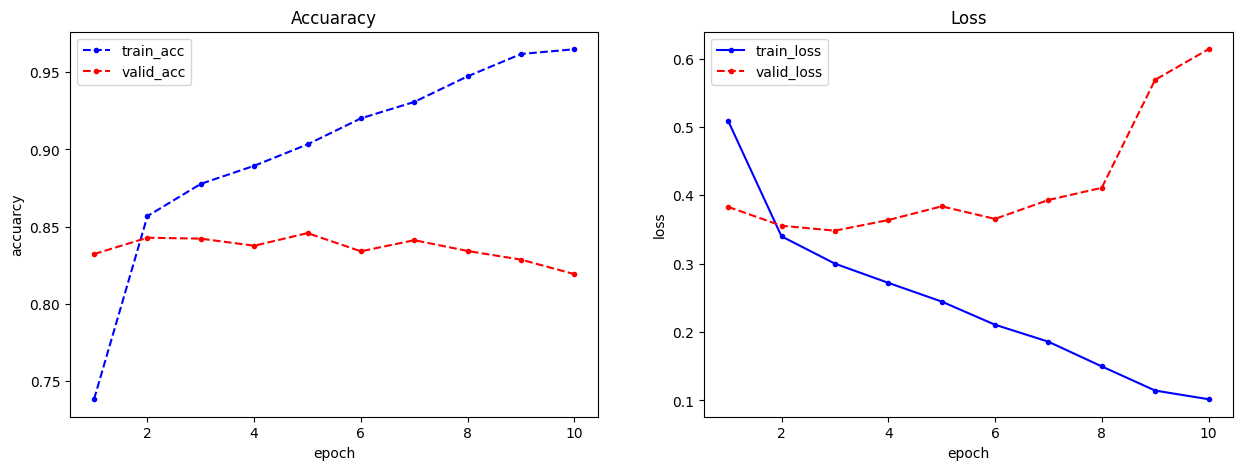

In [33]:
# accuarcy & loss graph
import numpy as np
epoch = np.arange(1,11)
acc_train = hist.history['accuracy']
acc_valid = hist.history['val_accuracy']
loss_train = hist.history['loss']
loss_valid = hist.history['val_loss']

import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(epoch, acc_train, 'b--',
         marker='.',
         label='train_acc')
plt.plot(epoch, acc_valid, 'r--',
         marker='.',
         label='valid_acc')
plt.title('Accuaracy')
plt.xlabel('epoch')
plt.ylabel('accuarcy')
plt.legend()
plt.subplot(122)
plt.plot(epoch, loss_train, 'b',
         marker='.',
         label='train_loss')
plt.plot(epoch, loss_valid, 'r--',
         marker='.',
         label='valid_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()